In [1]:
#import libraries
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#importing dataset
dataset = pd.read_csv('Churn_Modelling.csv')

In [3]:
#partial view of dataset from top
dataset.head()
#partial view of dataset from bottom
dataset.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [4]:
#basic dataset information
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
#dimention of the dataset
dataset.shape

(10000, 14)

In [6]:
#checking for missing values
print(str('Any missing data or NaN in the dataset:'),dataset.isnull().values.any())

Any missing data or NaN in the dataset: False


                 RowNumber  CustomerId  CreditScore       Age    Tenure  \
RowNumber         1.000000    0.004202     0.005840  0.000783 -0.006495   
CustomerId        0.004202    1.000000     0.005308  0.009497 -0.014883   
CreditScore       0.005840    0.005308     1.000000 -0.003965  0.000842   
Age               0.000783    0.009497    -0.003965  1.000000 -0.009997   
Tenure           -0.006495   -0.014883     0.000842 -0.009997  1.000000   
Balance          -0.009067   -0.012419     0.006268  0.028308 -0.012254   
NumOfProducts     0.007246    0.016972     0.012238 -0.030680  0.013444   
HasCrCard         0.000599   -0.014025    -0.005458 -0.011721  0.022583   
IsActiveMember    0.012044    0.001665     0.025651  0.085472 -0.028362   
EstimatedSalary  -0.005988    0.015271    -0.001384 -0.007201  0.007784   
Exited           -0.016571   -0.006248    -0.027094  0.285323 -0.014001   

                  Balance  NumOfProducts  HasCrCard  IsActiveMember  \
RowNumber       -0.009067   

<AxesSubplot:>

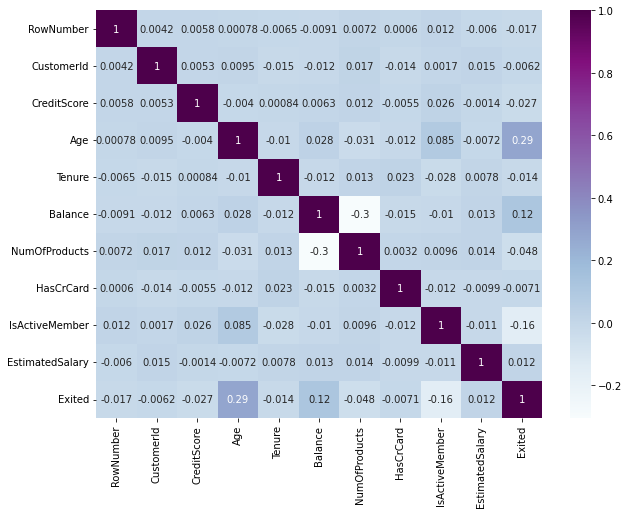

In [7]:
#finding correlation between the features
corr_var=dataset.corr()
print(corr_var)
plt.figure(figsize=(10,7.5))
sns.heatmap(corr_var, annot=True, cmap='BuPu')

In [8]:
X = dataset.iloc[:, 3:-1].values

In [9]:
#target value
y = dataset.iloc[:, -1].values

In [10]:
#as we have two columns as categorical terms we go for encoding we need to convert to numericals
#Categorical encoding
#gender will have some correlation with other feature so we go for label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#gender column in index 2
X[:, 2] = le.fit_transform(X[:, 2])

In [11]:
#country name won't be that much correlation added it has more than 2 names so go for one hot encoding
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
#country name is present in 1st index value
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [12]:
#training and testing split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [13]:
#feature scaling is an important and mandatory for ann process before modelling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [14]:
#ANN - initializing
ann = tf.keras.models.Sequential()

In [15]:
#input layer
# 6 features
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [16]:
#hidden layer
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [17]:
#output layer
#as target value is binary - AF
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [18]:
#compiling
#loss - target is binary 
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [19]:
#training set
ann.fit(X_train, y_train, batch_size = 32, epochs = 50)

Epoch 1/50
219/219 [==============================] - 1s 3ms/step - loss: 0.7057 - accuracy: 0.5654
Epoch 2/50
219/219 [==============================] - 1s 3ms/step - loss: 0.5178 - accuracy: 0.7867
Epoch 3/50
219/219 [==============================] - 1s 3ms/step - loss: 0.4812 - accuracy: 0.7977
Epoch 4/50
219/219 [==============================] - 1s 3ms/step - loss: 0.4570 - accuracy: 0.8017
Epoch 5/50
219/219 [==============================] - 1s 3ms/step - loss: 0.4396 - accuracy: 0.8129
Epoch 6/50
219/219 [==============================] - 1s 3ms/step - loss: 0.4292 - accuracy: 0.8161
Epoch 7/50
219/219 [==============================] - 1s 3ms/step - loss: 0.4218 - accuracy: 0.8179
Epoch 8/50
219/219 [==============================] - 1s 3ms/step - loss: 0.4159 - accuracy: 0.8213
Epoch 9/50
219/219 [==============================] - 1s 3ms/step - loss: 0.4110 - accuracy: 0.8254
Epoch 10/50
219/219 [==============================] - 1s 3ms/step - loss: 0.4070 - accuracy: 0.8256

In [20]:
#test result - prediction
y_pred = ann.predict(X_test)

In [21]:
#insted of values we ll get 0 or 1
y_pred = (y_pred > 0.5)
#actual vs prediicted outputs
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [1 1]]


In [22]:
#accuracy and confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[2248  131]
 [ 302  319]]


0.8556666666666667